In [4]:
# Imports

In [5]:
%load_ext autoreload
%autoreload 2

# libraries
import networkx as nx
import random
import matplotlib
import matplotlib.pyplot as plt

# our code
from _solver import squared_distance, BTSPSolverCP

In [6]:
## Utils

In [7]:
def random_points(n, w=10_000, h=10_000):
    """
    Generate a list of n randomly placed points on the w x h grid.
    """
    return [(random.randint(0,w), random.randint(0,h)) for _ in range(n)]

def draw_btsp_edges(edges):
    """
    Draw the edges of a DBST. The bottleneck edge(s) automatically get highlighted.
    """
    points = set([e[0] for e in edges] + [e[1] for e in edges])
    draw_graph = nx.empty_graph()
    draw_graph.add_nodes_from(points)
    draw_graph.add_edges_from(edges)
    g_edges = draw_graph.edges()
    max_length = max((squared_distance(*e) for e in g_edges))
    color = [('red' if squared_distance(*e) == max_length else 'black') for e in g_edges]
    width = [(1.0 if squared_distance(*e) == max_length else 0.5) for e in g_edges]
    plt.clf()
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(8,8)
    ax.set_aspect(1.0)  # 1:1 aspect ratio
    nx.draw_networkx(draw_graph, pos={p: p for p in points}, node_size=8,
                     with_labels=False, edgelist=g_edges, edge_color=color, width=width, ax=ax)
    plt.show()

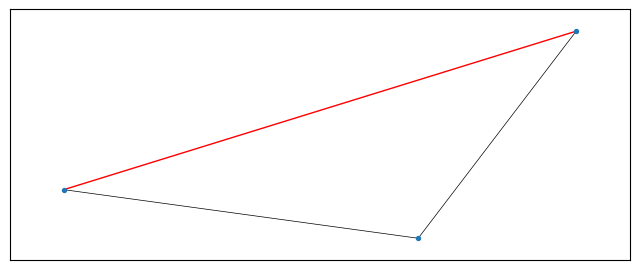

In [8]:
#random.seed(1234567) # remove if you want random instances
solver = BTSPSolverCP(random_points(3))
draw_btsp_edges(solver.solve())

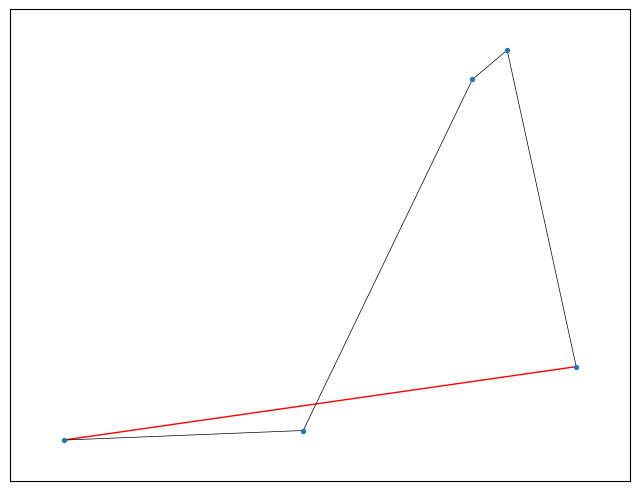

In [9]:
#random.seed(1234567) # remove if you want random instances
solver = BTSPSolverCP(random_points(5))
draw_btsp_edges(solver.solve())

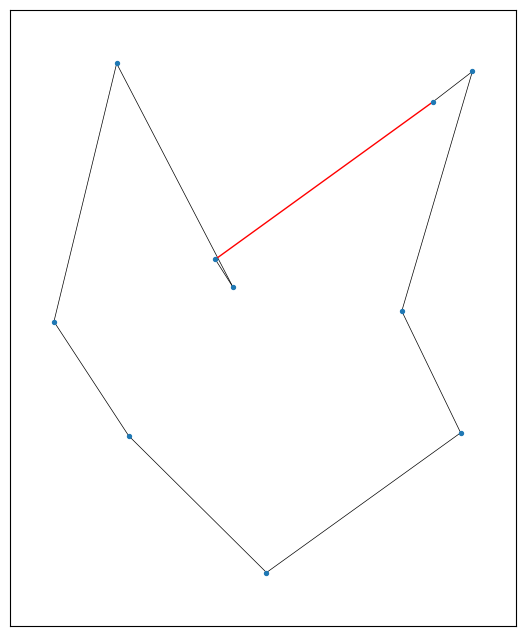

In [10]:
#random.seed(1234567) # remove if you want random instances
solver = BTSPSolverCP(random_points(10))
draw_btsp_edges(solver.solve())

In [11]:
## Benchmark

In [17]:
import time

for i in range(3,103):
    BTSPSolverCP(random_points(i))
    print(i-2)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
